# `chessrl` package

In [3]:
from chessrl import Env, LichessDefender, SyzygyDefender
from chessrl import chess_py as cp

In [2]:
from chessrl import utils

# If the above doesn't work, try one of these alternatives:
# from chessrl.utils import create_endgames
# import chessrl.create_endgames

The `Env` class defines the reinforcement learning environment. It can be initialized giving the FEN representation of a chess game, the step penalty (to favor faster mate) and the defender (`LichessDefender` or `SyzygyDefender`) that plays moves for the black side.

The env class treats the black turn as part of the environment response to the white move.

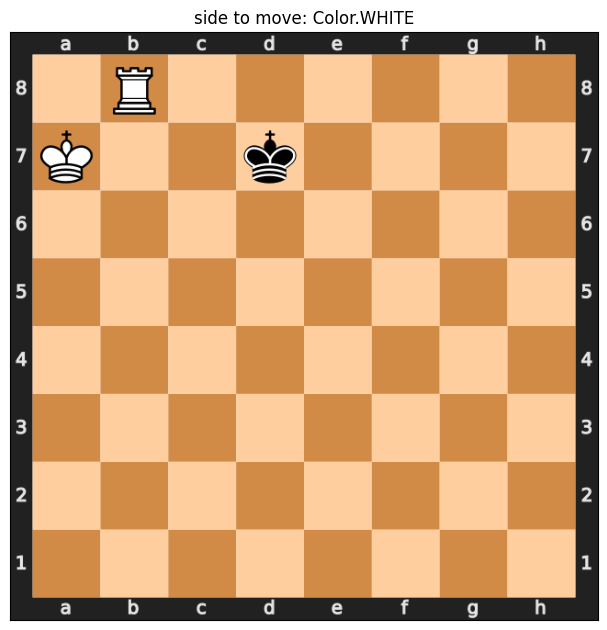

In [6]:
fen = "1R6/K2k4/8/8/8/8/8/8 w - - 1 0"
env = Env.from_fen(
    fen,
    step_penalty=0.01,
    defender=LichessDefender(),    # auto-reply using Lichess tablebase
    absorb_black_reply=True
)
env.display_state()

Step result: StepResult(reward=-0.01, done=False, info={'absorbed_reply': True, 'reply_uci': 'd7c6'})
Current FEN: 8/KR6/2k5/8/8/8/8/8 w - - 0 1
Current Board:
(board print unavailable)
Side to move: White
Is Game Over: No
Current Ply: 2



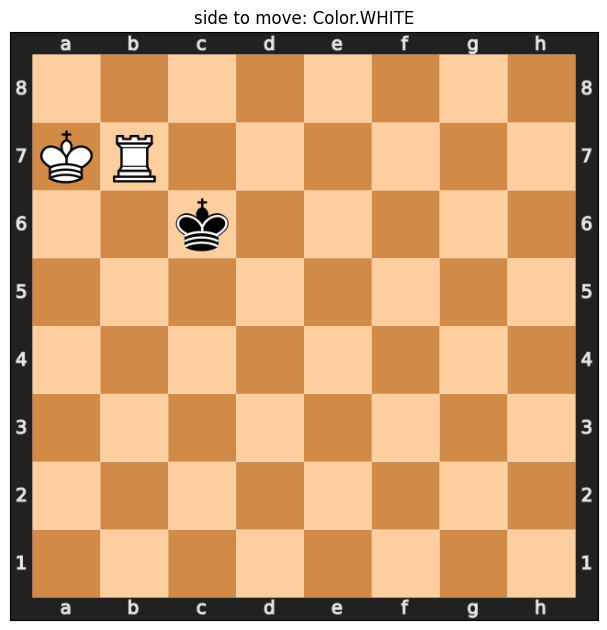

In [ ]:
# 2. White plays a move (UCI or Move object)
agent_move = "b8b7"
result = env.step(agent_move)

# 3. Print outcome and environment info
print("Step result:", result)
print(env.to_string())
env.display_state()


note that after the white move we have the black response, played thanks to Lichess API

In [11]:
g = env.state()
stm = g.get_side_to_move()
print("Side to move:", "BLACK" if stm == cp.Color.BLACK else "WHITE")
print("in_check(BLACK):", g.get_check(cp.Color.BLACK) if hasattr(g, "get_check") else g.in_check())
print("is_checkmate:", g.is_checkmate())
print("is_stalemate:", g.is_stalemate())

# Count legal replies for White
moves = g.legal_moves(cp.Color.WHITE)
print("num legal moves for White:", len(moves))
print("sample replies (up to 5):", [cp.Move.to_uci(m) for m in moves[:5]])

print("is_game_over():", g.is_game_over())

print("is insufficient material():", g.is_insufficient_material())


Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
num legal moves for White: 16
sample replies (up to 5): ['a7a6', 'a7a8', 'a7b8', 'b7b1', 'b7b2']
is_game_over(): False
is insufficient material(): False


## Syzygy Defender

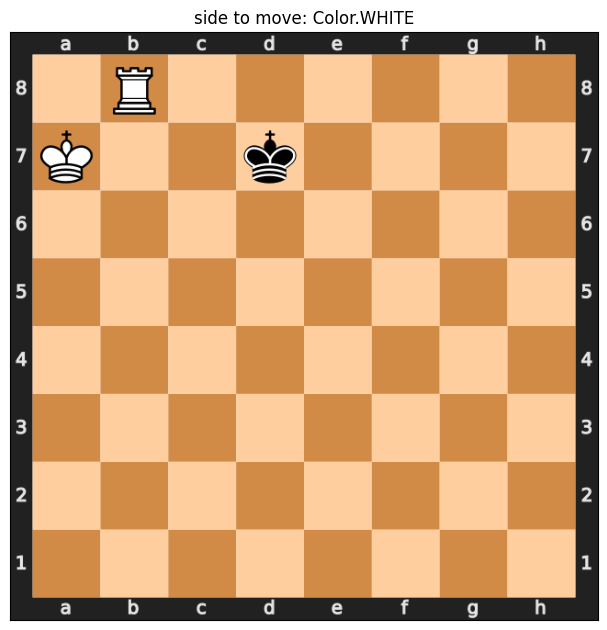

In [15]:
env = Env.from_fen(
    "1R6/K2k4/8/8/8/8/8/8 w - - 1 0",
    step_penalty=0.01,
    defender=SyzygyDefender("../src/value_iteration/tablebase/"),   # or SyzygyDefender("/path/to/tables")
)
env.display_state()

Step result: StepResult(reward=-0.01, done=False, info={'absorbed_reply': True, 'reply_uci': 'd7e8'})
Current FEN: 4k3/KR6/8/8/8/8/8/8 w - - 0 1
Current Board:
(board print unavailable)
Side to move: White
Is Game Over: No
Current Ply: 2



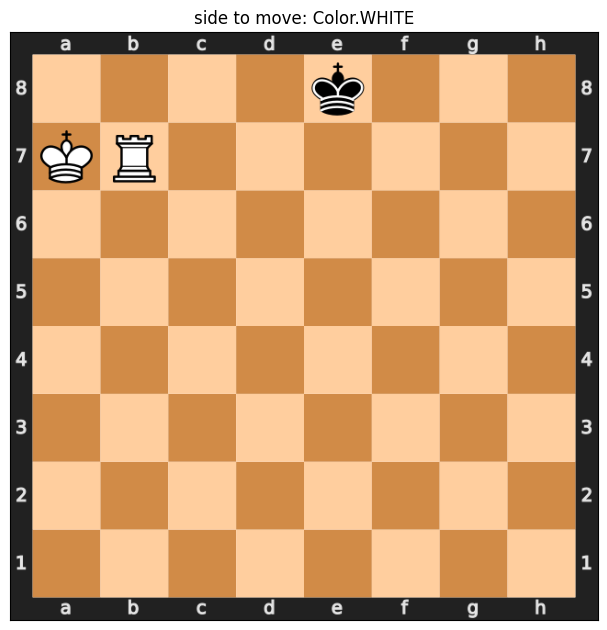

In [16]:
agent_move = "b8b7"
result = env.step(agent_move)

# 3. Print outcome and environment info
print("Step result:", result)
print(env.to_string())
env.display_state()


In [17]:
g = env.state()
stm = g.get_side_to_move()
print("Side to move:", "BLACK" if stm == cp.Color.BLACK else "WHITE")
print("in_check(BLACK):", g.get_check(cp.Color.BLACK) if hasattr(g, "get_check") else g.in_check())
print("is_checkmate:", g.is_checkmate())
print("is_stalemate:", g.is_stalemate())

# Count legal replies for White
moves = g.legal_moves(cp.Color.WHITE)
print("num legal moves for White:", len(moves))
print("sample replies (up to 5):", [cp.Move.to_uci(m) for m in moves[:5]])

print("is_game_over():", g.is_game_over())

print("is insufficient material():", g.is_insufficient_material())


Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
num legal moves for White: 17
sample replies (up to 5): ['a7a6', 'a7b6', 'a7a8', 'a7b8', 'b7b1']
is_game_over(): False
is insufficient material(): False


## testing stalemate

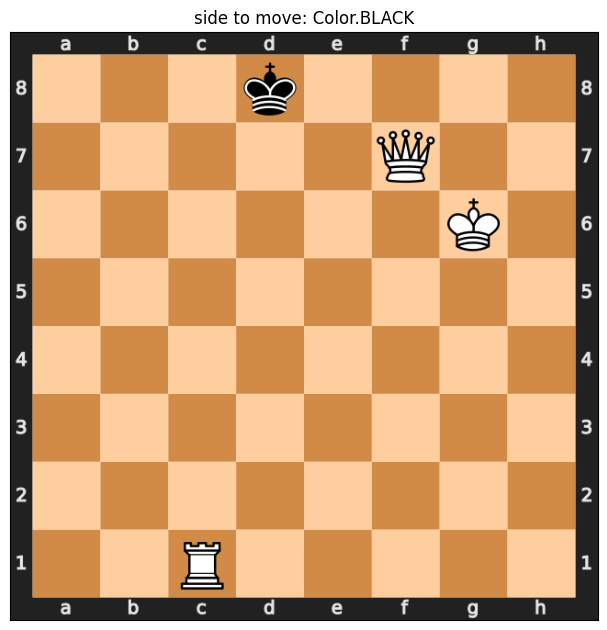

In [11]:
env = Env.from_fen(
    "3k4/5Q2/6K1/8/8/8/8/2R5 b - - 1 0",
    step_penalty=0.01,
)
env.display_state()

In [12]:
g = env.state()
stm = g.get_side_to_move()
print("Side to move:", "BLACK" if stm == cp.Color.BLACK else "WHITE")
print("in_check(BLACK):", g.get_check(cp.Color.BLACK) if hasattr(g, "get_check") else g.in_check())
print("is_checkmate:", g.is_checkmate())
print("is_stalemate:", g.is_stalemate())

# Count legal replies for White
moves = g.legal_moves(cp.Color.WHITE)
print("num legal moves for White:", len(moves))
print("sample replies (up to 5):", [cp.Move.to_uci(m) for m in moves[:5]])

print("is_game_over():", g.is_game_over())

print("is insufficient material():", g.is_insufficient_material())

print("result:", g.result())

Side to move: BLACK
in_check(BLACK): False
is_checkmate: False
is_stalemate: True
num legal moves for White: 0
sample replies (up to 5): []
is_game_over(): True
is insufficient material(): False
result: 0.0


In [10]:
from chessrl.utils.mate_positions import generate_endgames_offline

# KR vs K, White to move, exact mate-in-2
fens = generate_endgames_offline("KRRvK", mate_in=2, side_to_move="w",
                                 max_positions=20, max_tries=50000)
print(len(fens))
for f in fens[:5]:
    print(f)


20
7k/8/2R5/8/2K1R3/8/8/8 w - - 0 1
4R3/4K3/8/8/4R3/8/8/7k w - - 0 1
4K2k/8/4R3/8/8/3R4/8/8 w - - 0 1
8/3R4/8/8/2K5/8/R7/k7 w - - 0 1
k7/7R/8/8/8/R7/1K6/8 w - - 0 1


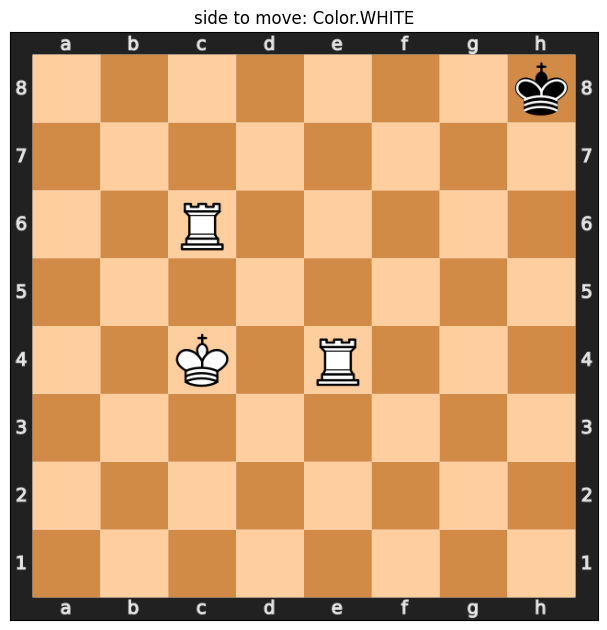

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


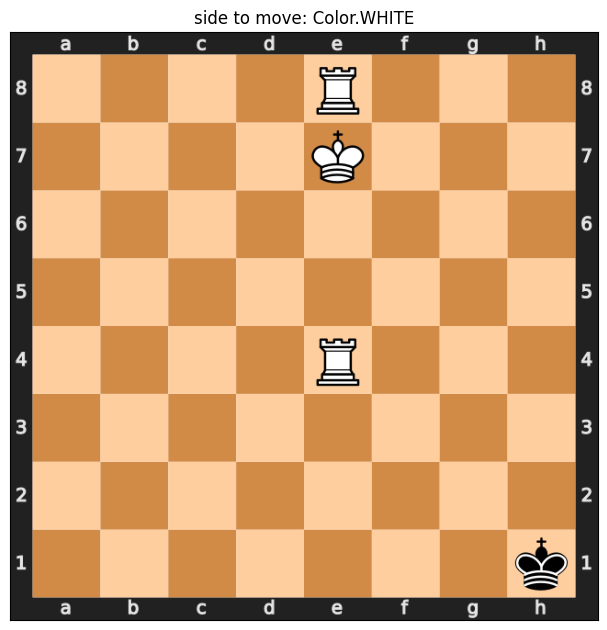

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


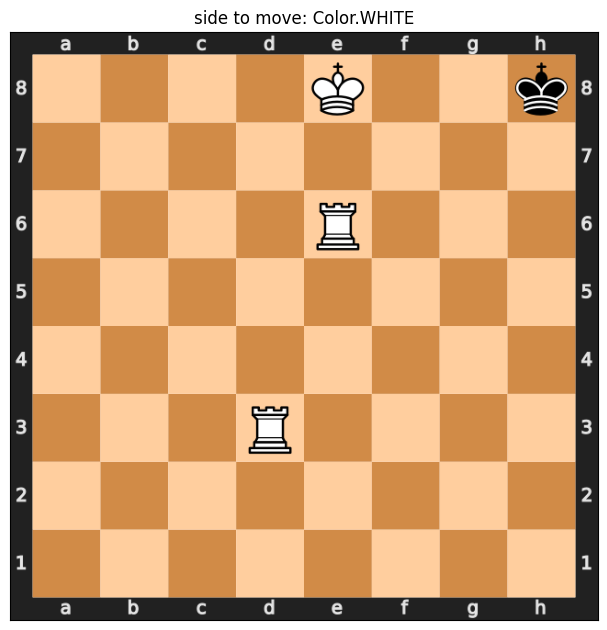

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


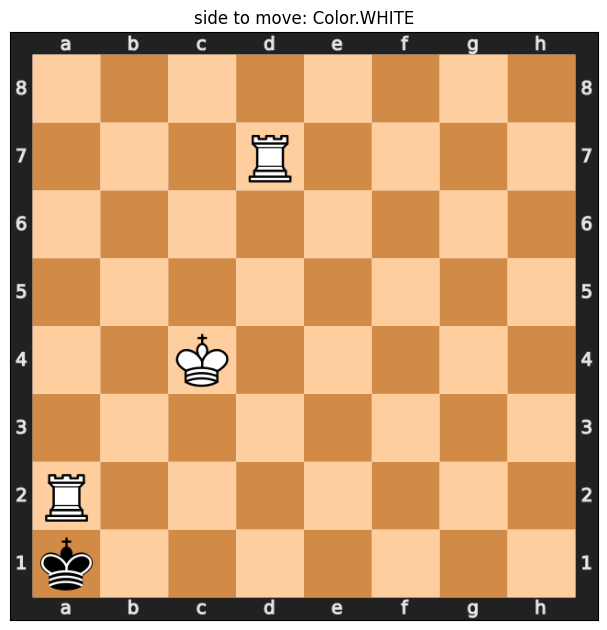

Side to move: WHITE
in_check(BLACK): True
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


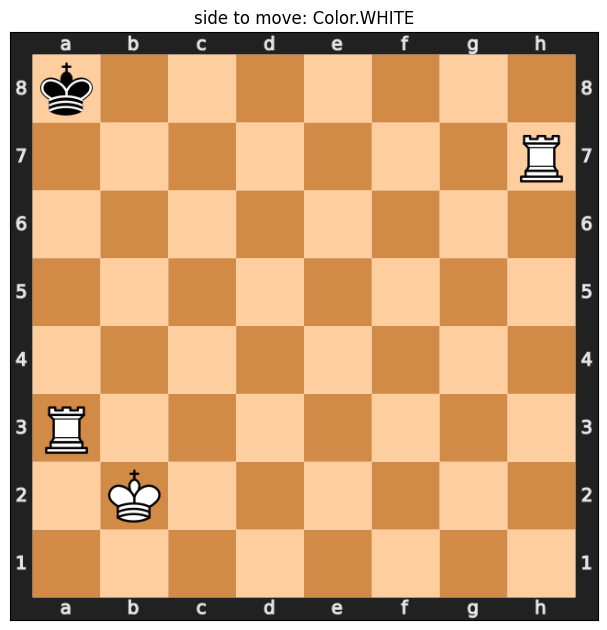

Side to move: WHITE
in_check(BLACK): True
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


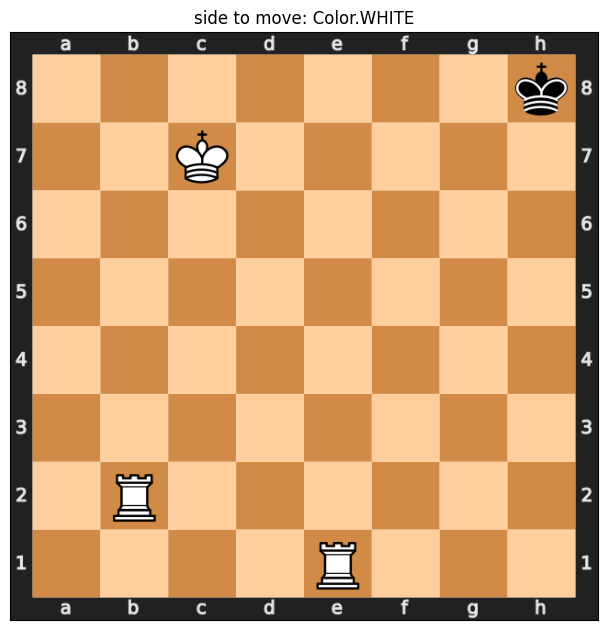

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


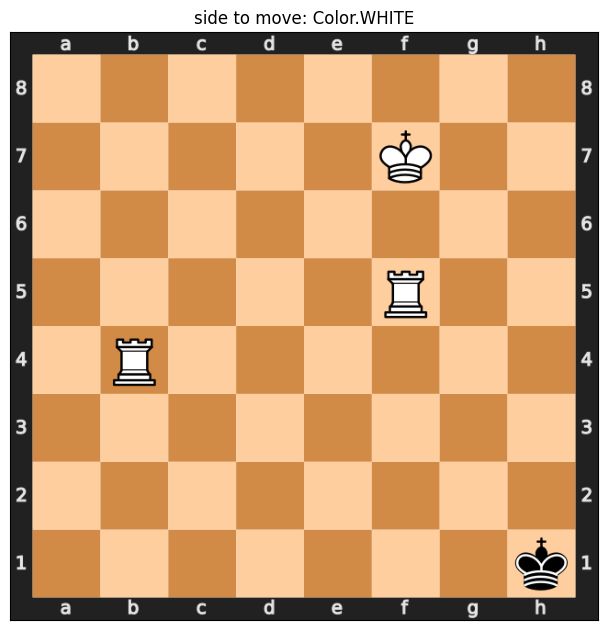

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


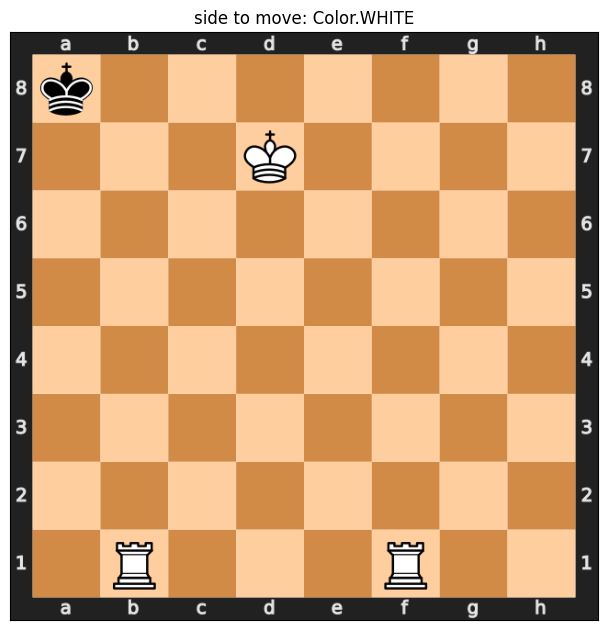

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


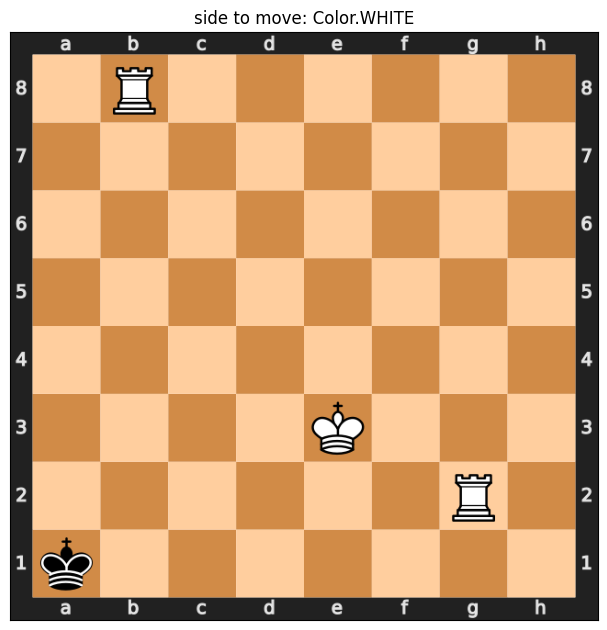

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


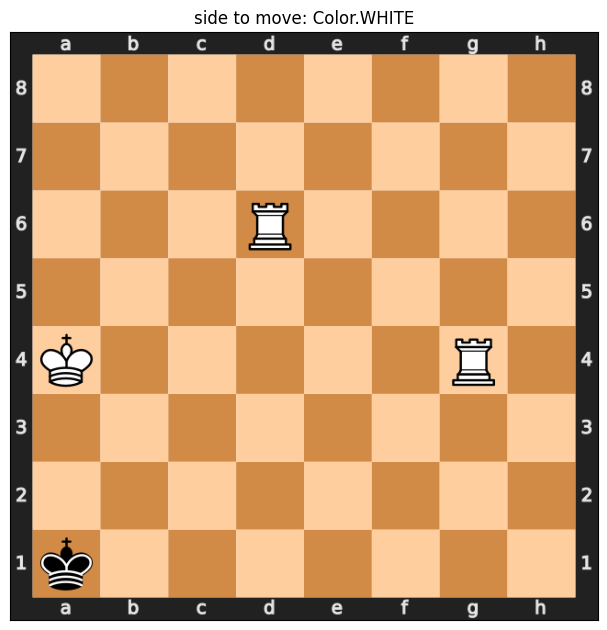

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


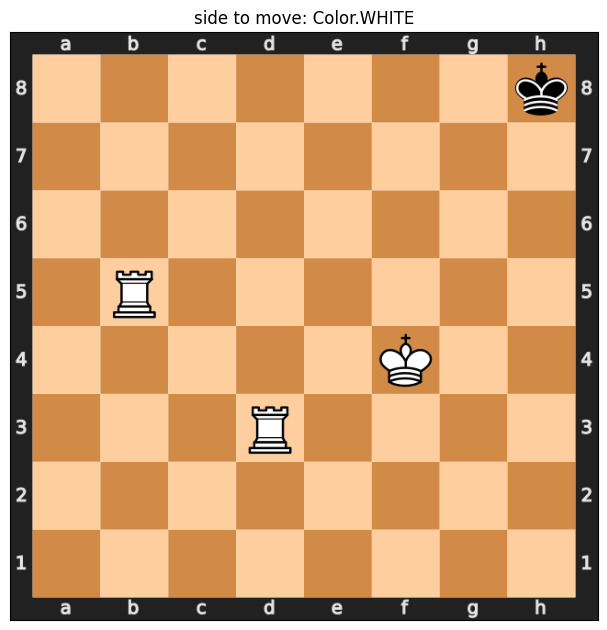

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


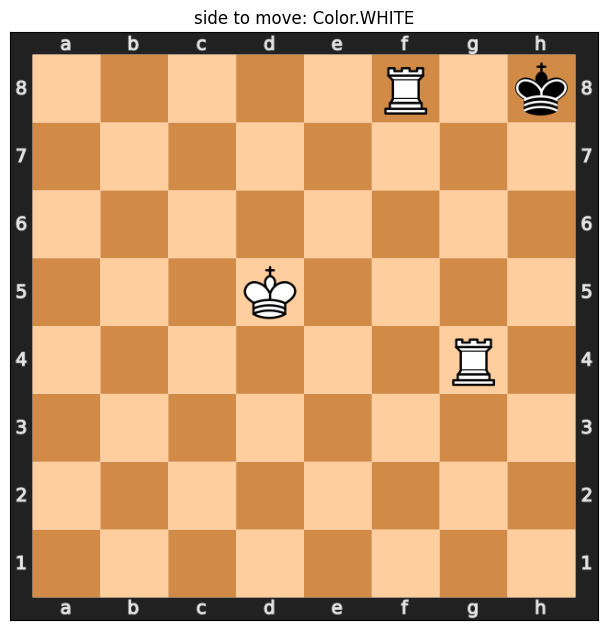

Side to move: WHITE
in_check(BLACK): True
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


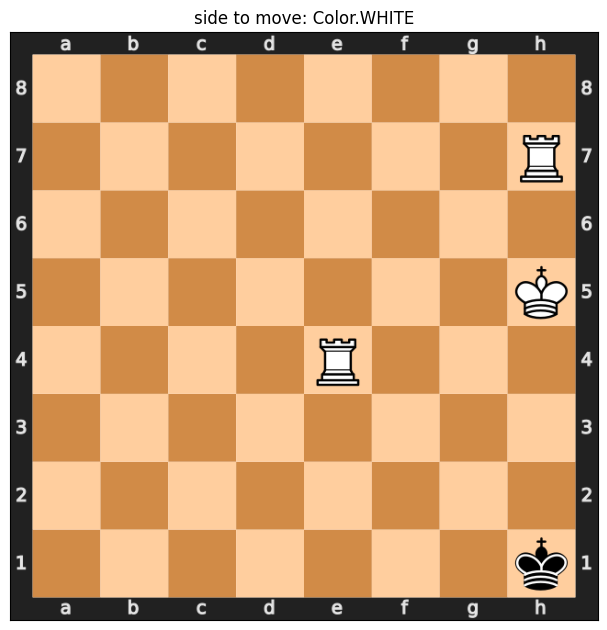

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


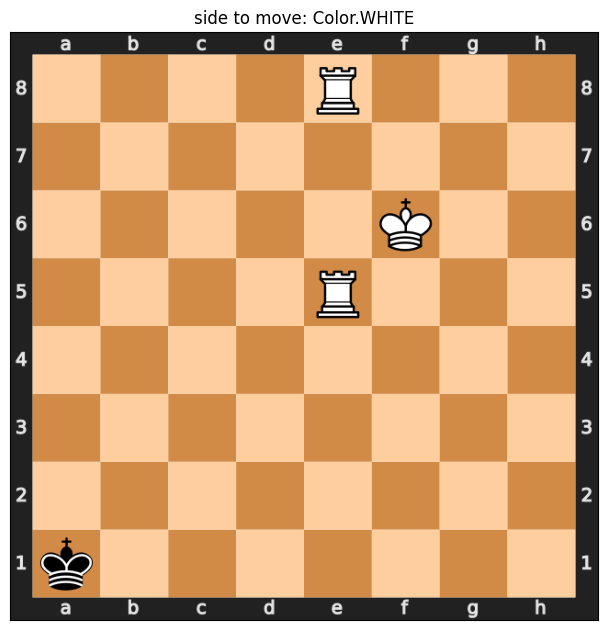

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


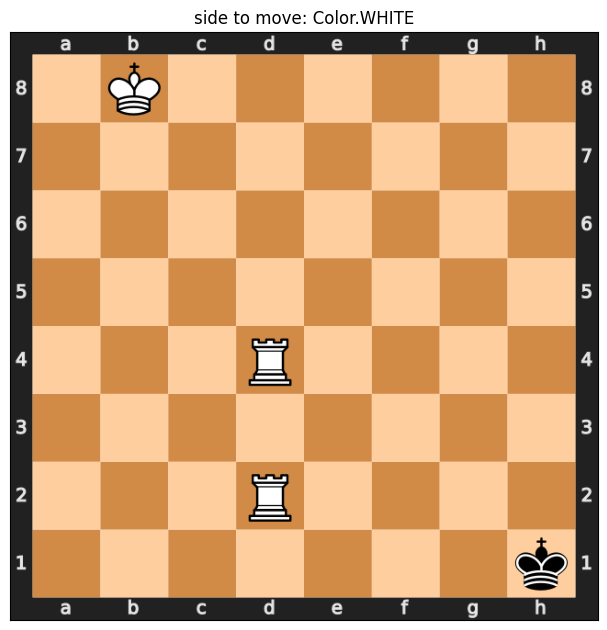

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


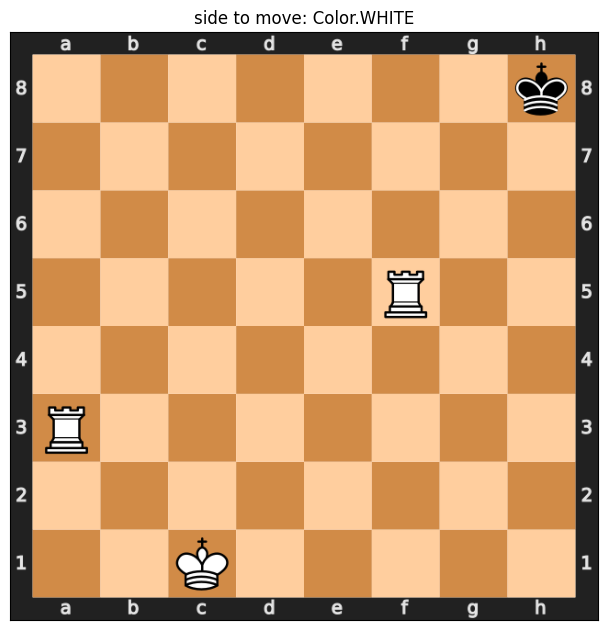

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


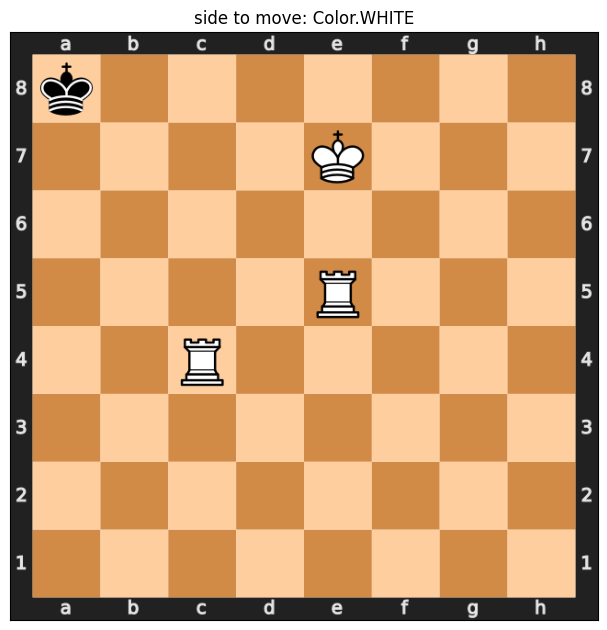

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


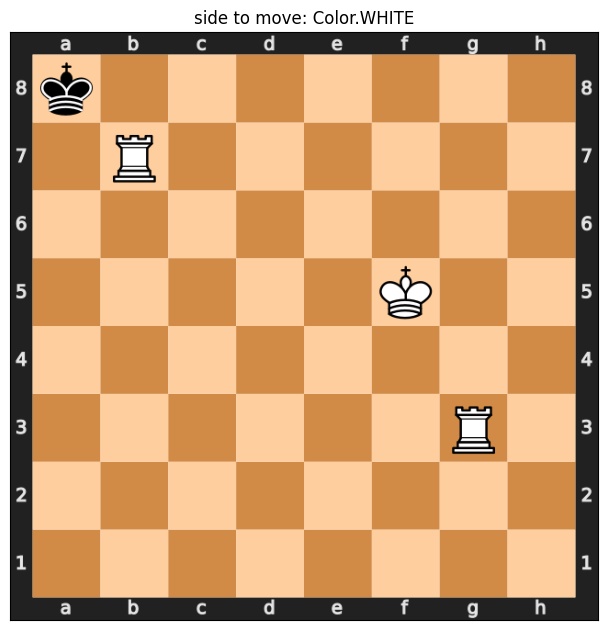

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


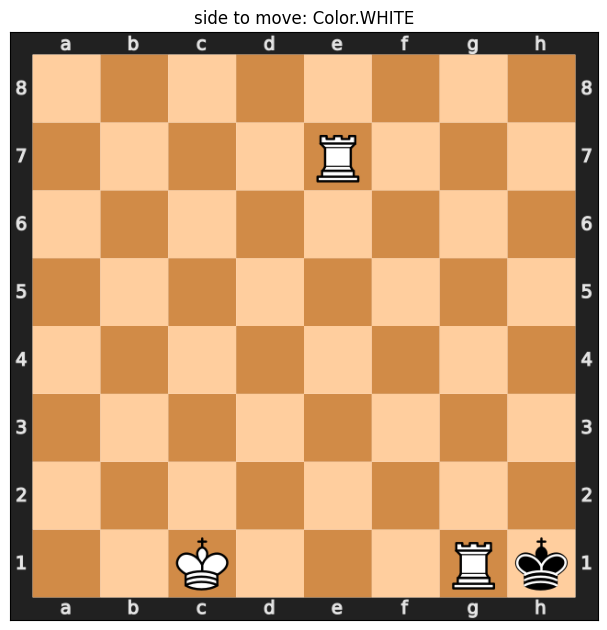

Side to move: WHITE
in_check(BLACK): True
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


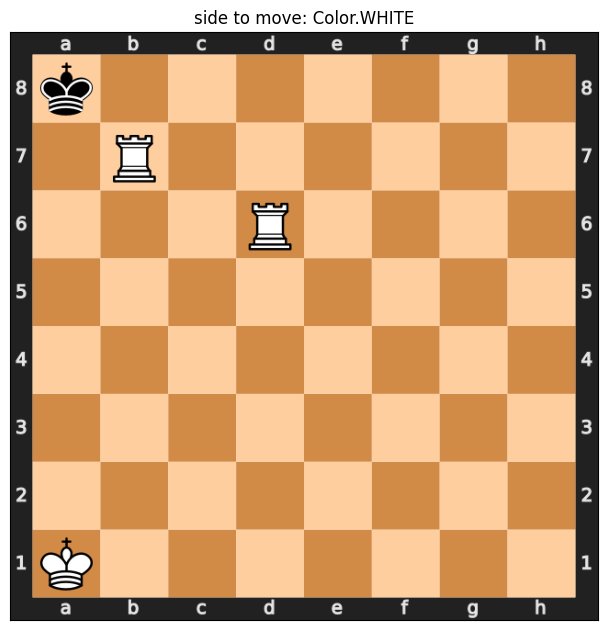

Side to move: WHITE
in_check(BLACK): False
is_checkmate: False
is_stalemate: False
is_game_over(): False
is insufficient material(): False


In [11]:
for f in fens:
    env = Env.from_fen(f, step_penalty=0.01)
    env.display_state()
    g = env.state()
    stm = g.get_side_to_move()
    print("Side to move:", "BLACK" if stm == cp.Color.BLACK else "WHITE")
    print("in_check(BLACK):", g.get_check(cp.Color.BLACK) if hasattr(g, "get_check") else g.in_check())
    print("is_checkmate:", g.is_checkmate())
    print("is_stalemate:", g.is_stalemate())
    print("is_game_over():", g.is_game_over())
    print("is insufficient material():", g.is_insufficient_material())

In [1]:
from chessrl.utils.mate_positions import sample_random_position, sample_random_positions


# 1 random KR vs K position (any terminal status allowed)
fen = sample_random_position("KRvK", side_to_move="w", seed=42)
print(fen)

# 10 non-terminal KQ vs K positions (smart bias on)
fens = sample_random_positions("KQvK", side_to_move="w", count=10, require_nonterminal=True)
print(len(fens), "positions")


8/1R6/8/8/8/8/8/k2K4 w - - 0 1
10 positions
